In [107]:
import os
import csv
import scipy
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings('ignore')

In [108]:
os.chdir("/data/proj/GCB_MK/CZI/episcanpy_analysis/AGG_ATAC_210218")

In [123]:
adata = ad.read("data/210301_merged_peak_matrix.h5ad")

In [124]:
adata

AnnData object with n_obs × n_vars = 19062 × 300425
    obs: 'NGI_ID', 'barcode', 'ProcessNumber', 'caseNO', 'Tissue', 'Sex', 'Age', 'PMI', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'ArchR_doublet'
    var: 'transcript_annotation'

In [56]:
adata.write("data/210301_merged_peak_matrix.h5ad")

... storing 'NGI_ID' as categorical
... storing 'caseNO' as categorical
... storing 'Tissue' as categorical
... storing 'Sex' as categorical
... storing 'MK_ID' as categorical
... storing 'ArchR_doublet' as categorical
... storing 'transcript_annotation' as categorical


In [122]:
def remove_first_PC(adata):
    adata.obsm["X_pca_all"] = adata.obsm["X_pca"]
    adata.obsm["X_pca"] = adata.obsm["X_pca"][:,1:]
    adata.uns["pca"]["variance_ratio"] = adata.uns["pca"]["variance_ratio"][1:]
    adata.uns["pca"]["variance"] = adata.uns["pca"]["variance"][1:]
    return adata

In [125]:
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

In [127]:
adata.obs["log_nb_features"] = [np.log10(x) for x in adata.obs["nb_features"]]

In [130]:
X = adata.X
tfidf = TfidfTransformer(use_idf=True)
X_norm = tfidf.fit_transform(X)
adata.X = X_norm

In [131]:
min_features = np.quantile(adata.obs["nb_features"], 0.1)
epi.pp.filter_cells(adata, min_features=min_features)

In [132]:
sc.tl.pca(adata, zero_center=False, n_comps=51)

In [133]:
remove_first_PC(adata)

AnnData object with n_obs × n_vars = 17157 × 300425
    obs: 'NGI_ID', 'barcode', 'ProcessNumber', 'caseNO', 'Tissue', 'Sex', 'Age', 'PMI', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'ArchR_doublet', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells'
    uns: 'pca'
    obsm: 'X_pca', 'X_pca_all'
    varm: 'PCs'

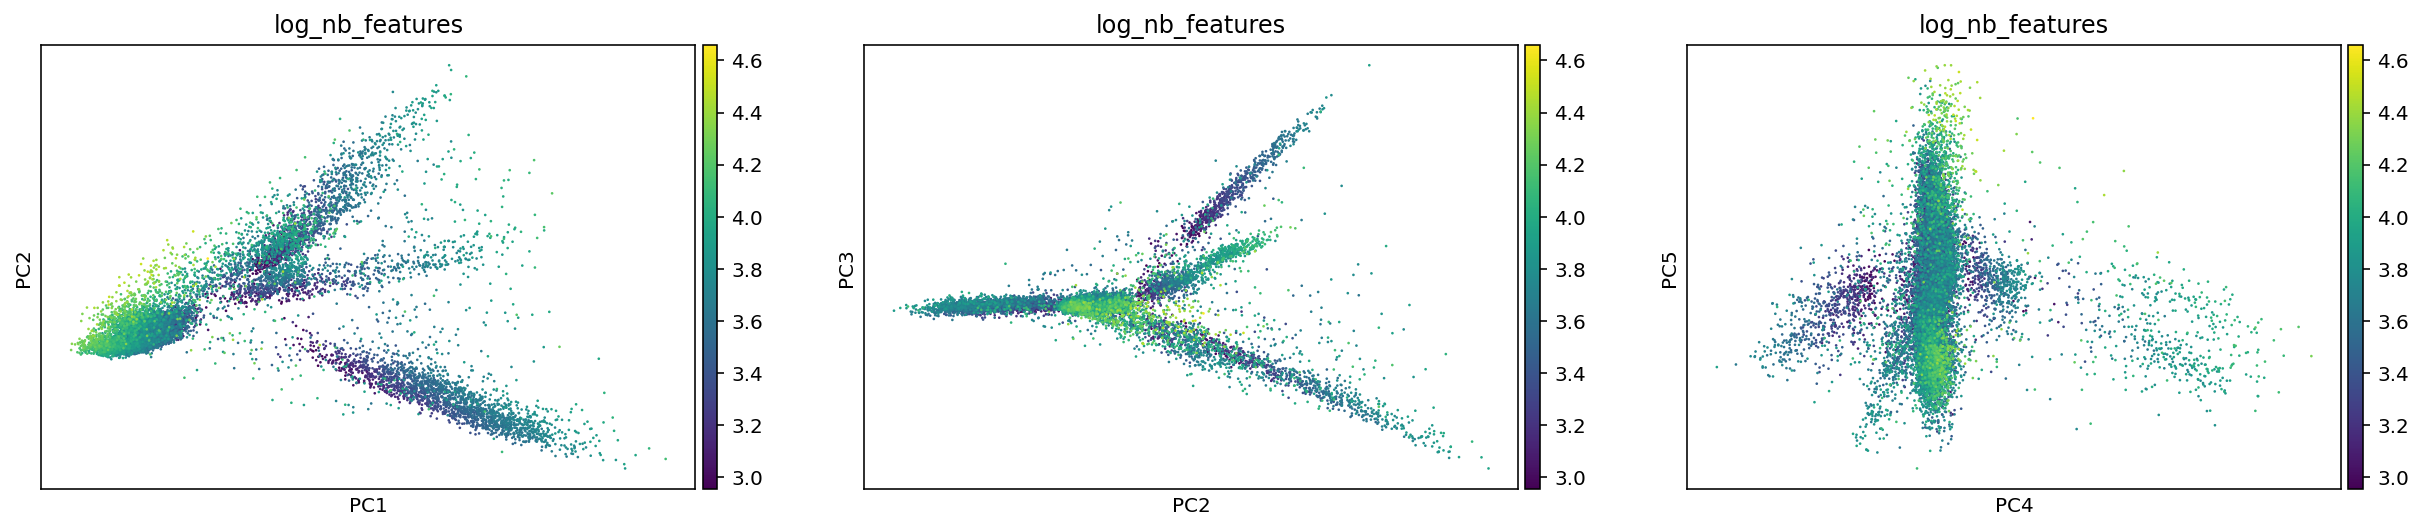

In [134]:
sc.pl.pca(adata, color="log_nb_features", components = ['1,2','2,3','4,5'])

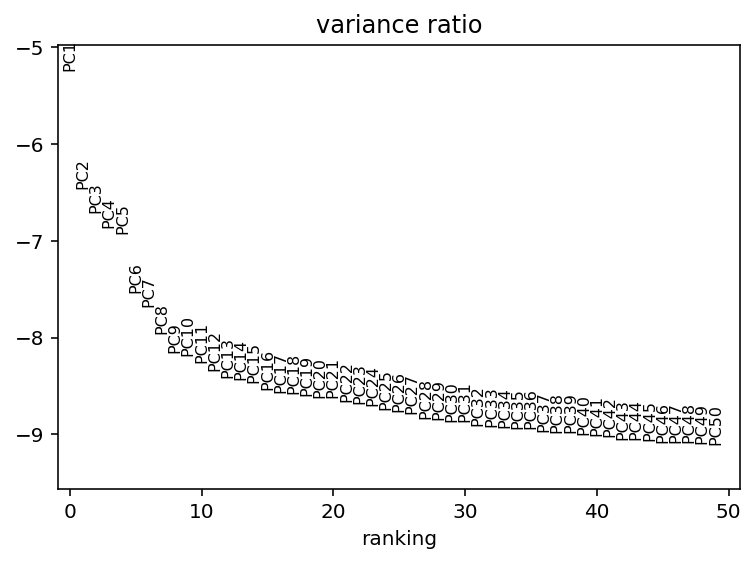

In [135]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [136]:
sc.pp.neighbors(adata, n_pcs = 50, n_neighbors = 15, metric="cosine")
sc.tl.umap(adata, n_components=2)
epi.tl.louvain(adata)

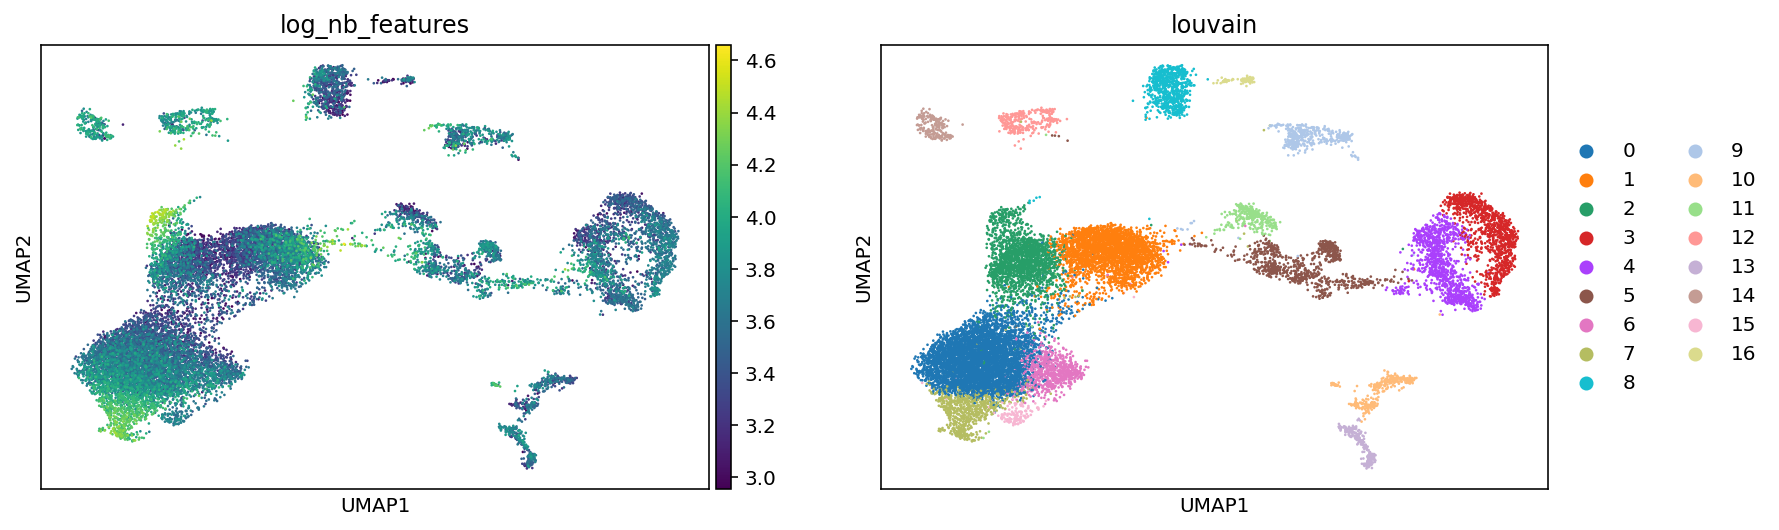

In [137]:
sc.pl.umap(adata, color=["log_nb_features", "louvain"])

In [138]:
epi.tl.rank_features(adata, 'louvain', omic='ATAC')

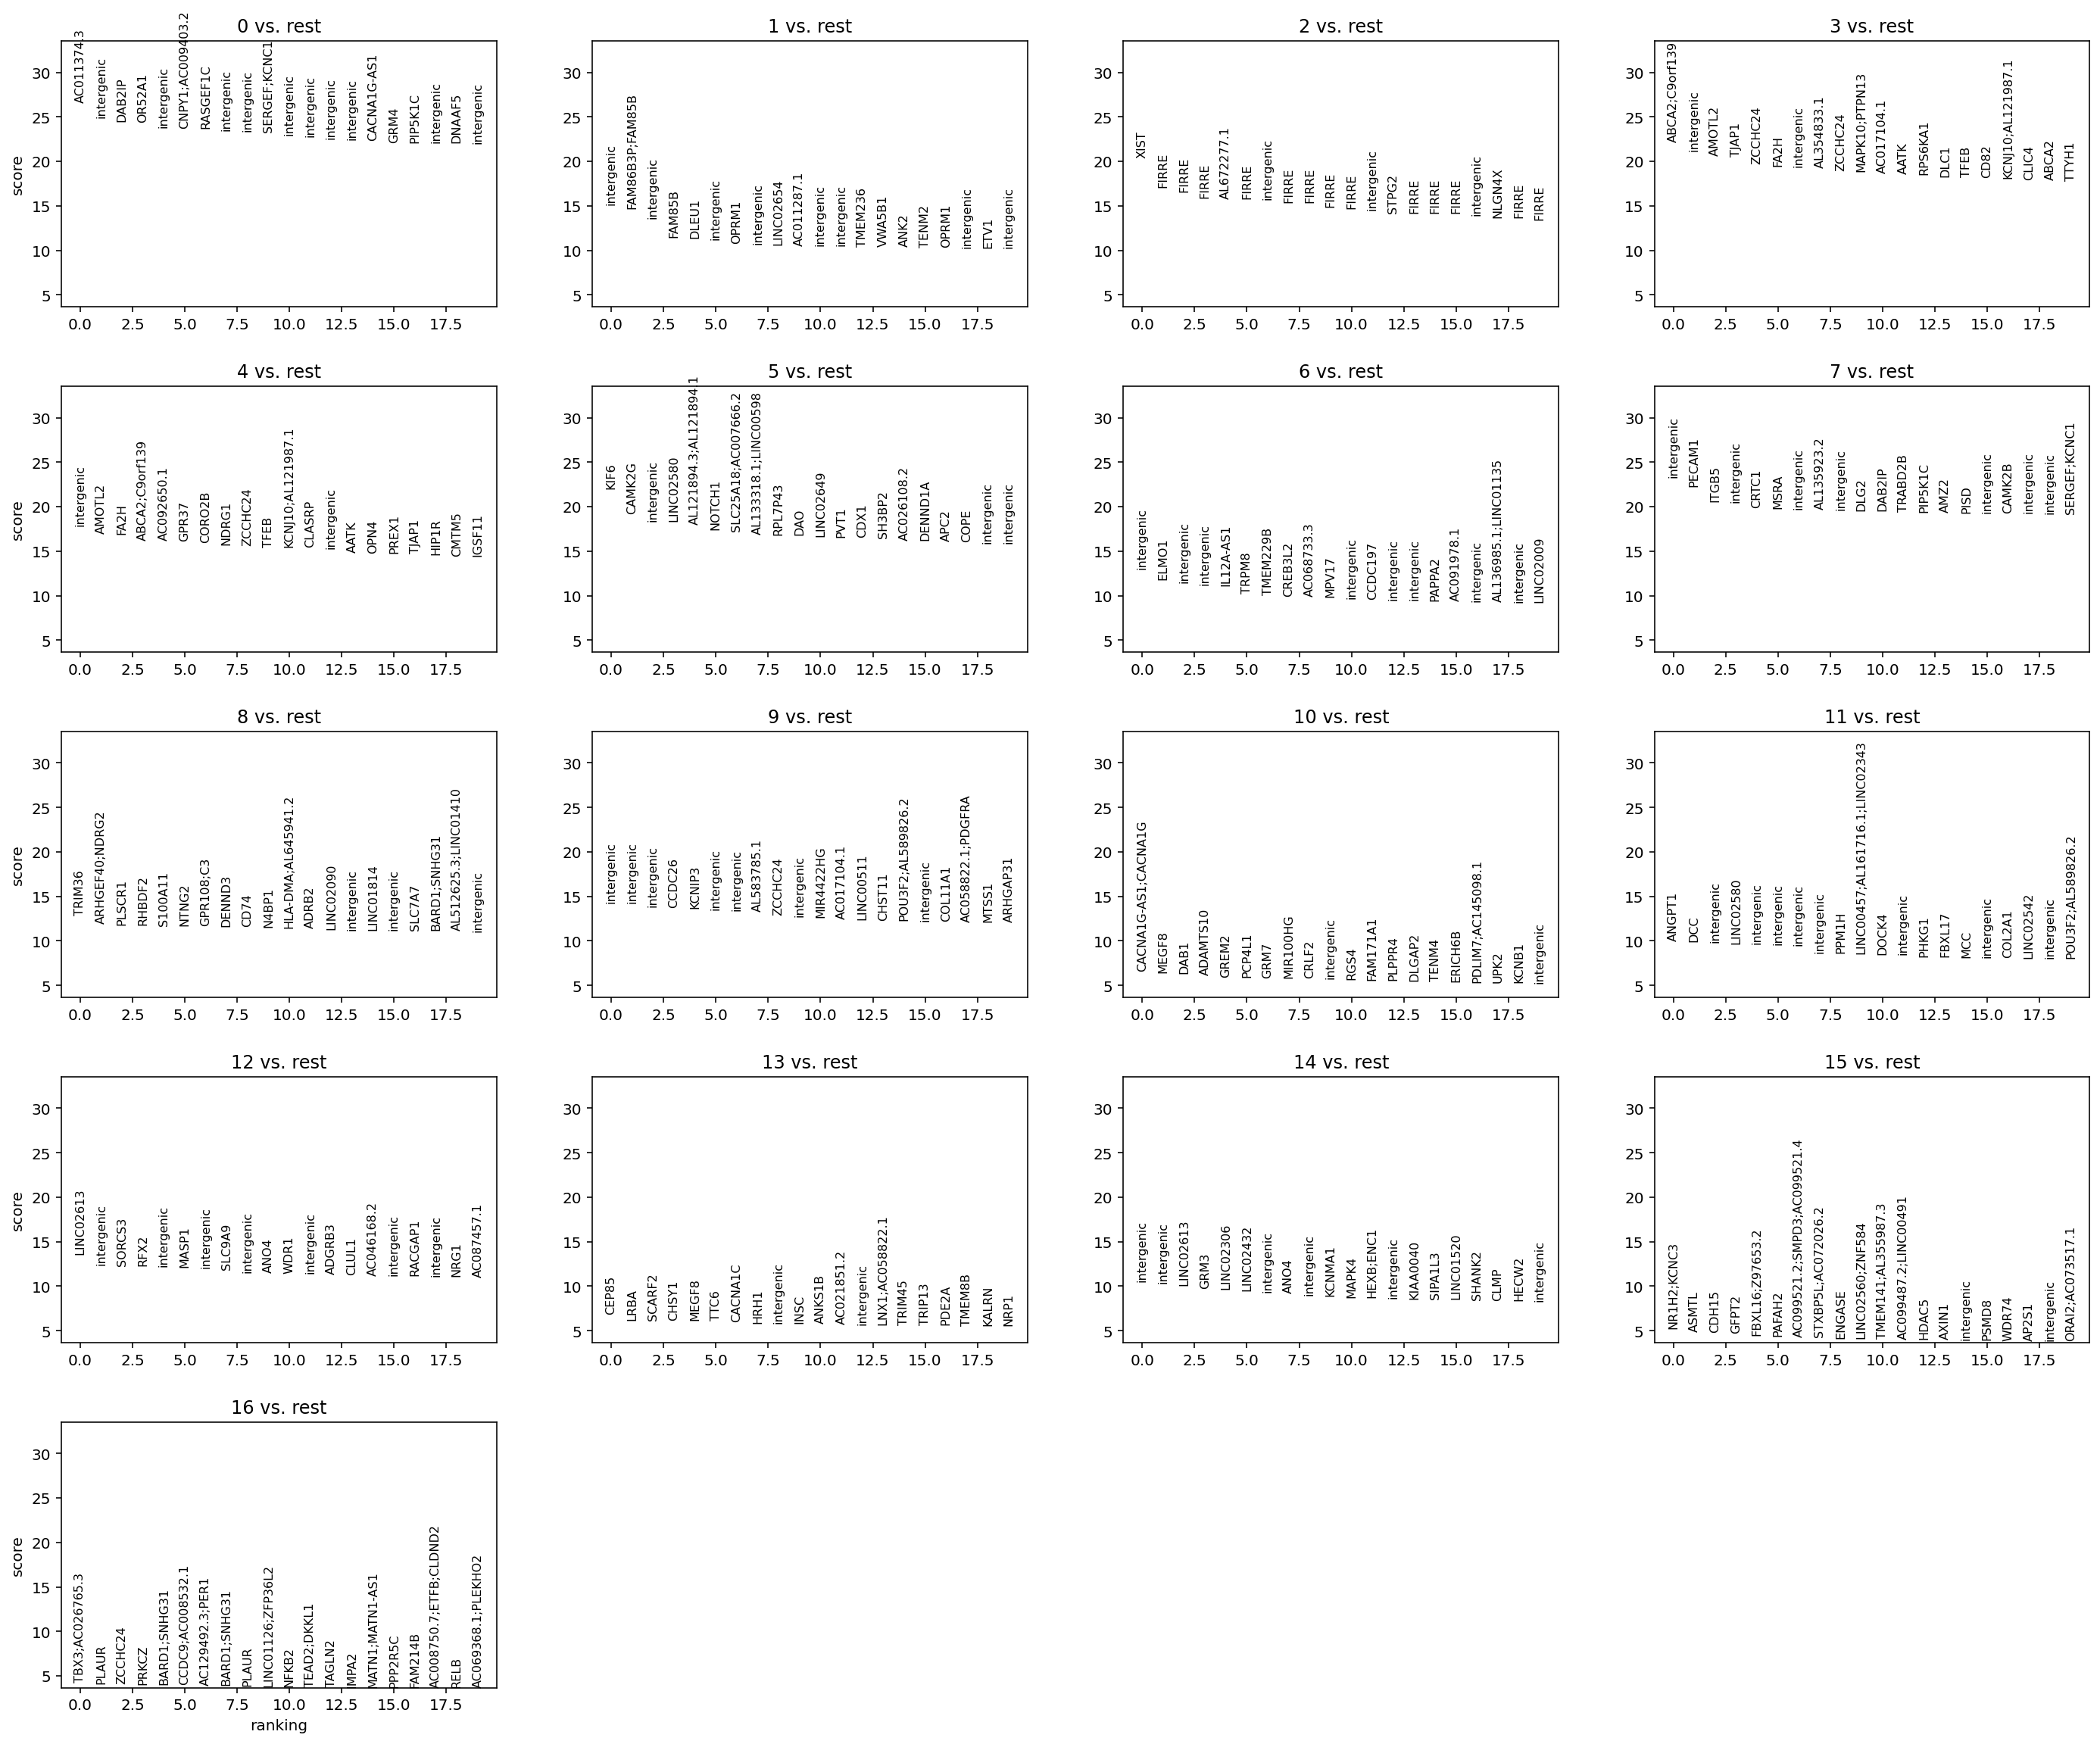

In [139]:
epi.pl.rank_feat_groups(adata, feature_symbols='transcript_annotation')

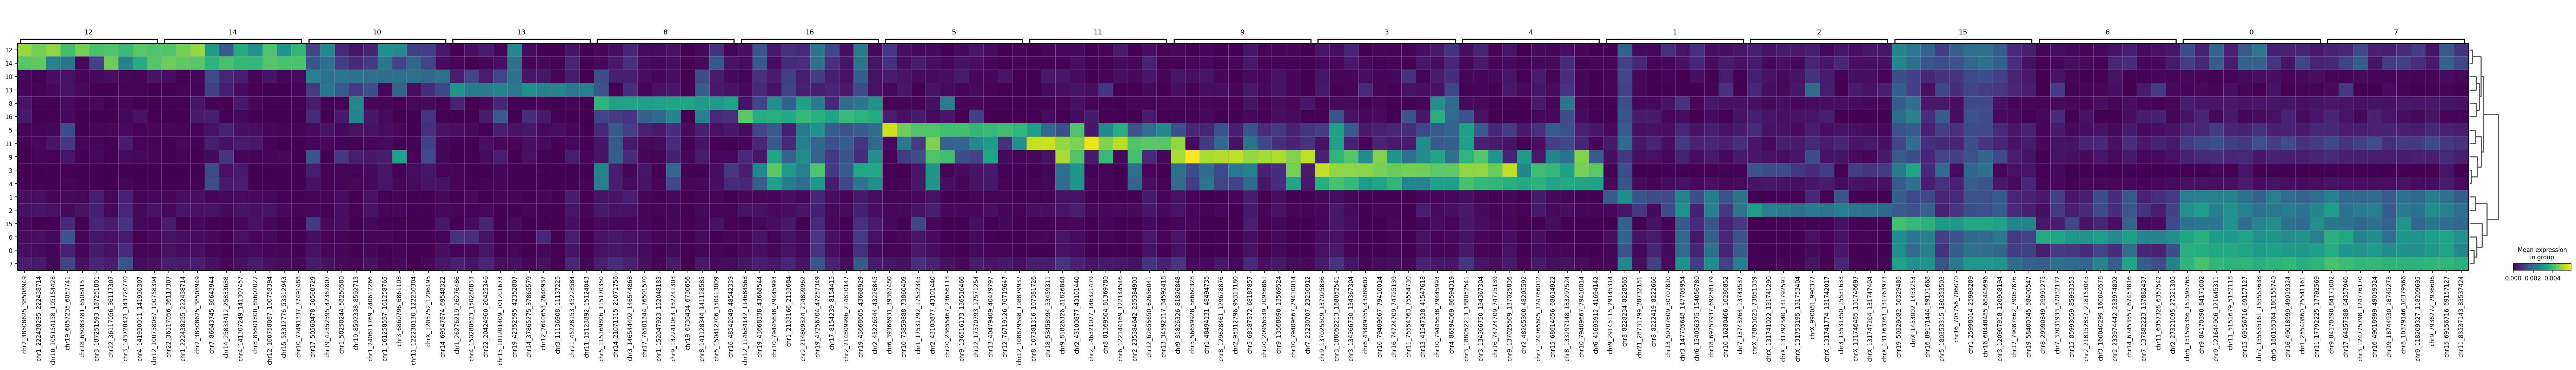

In [140]:
epi.pl.rank_feat_groups_matrixplot(adata)

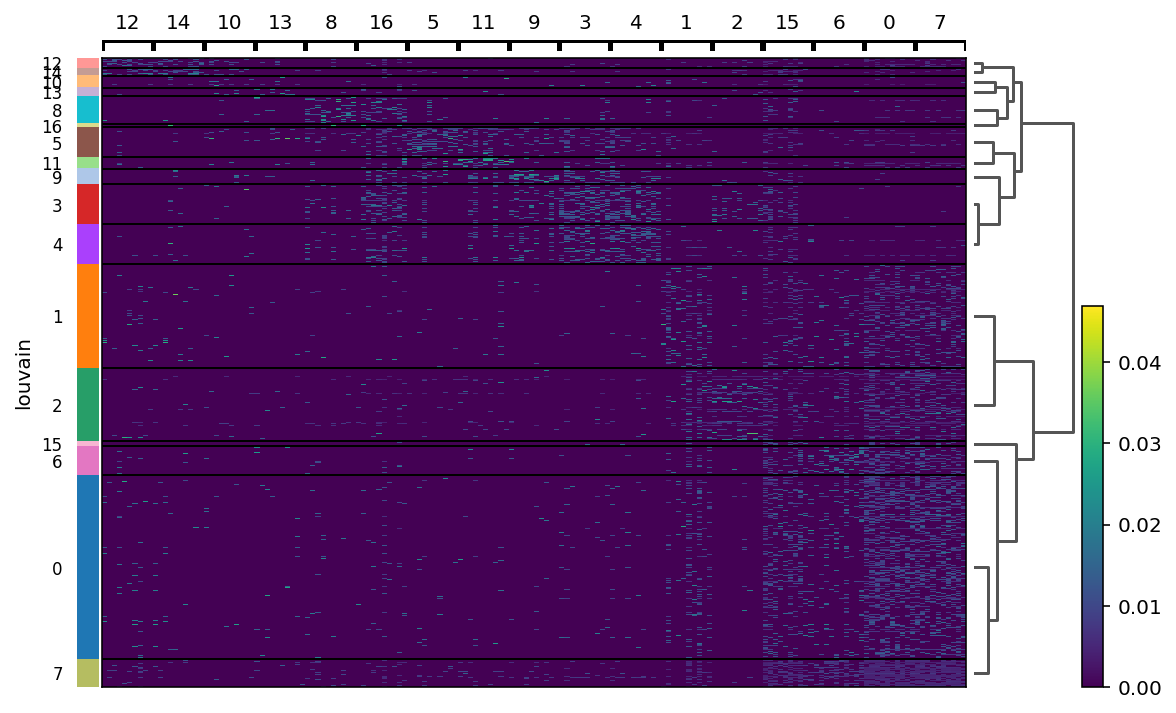

In [141]:
epi.pl.rank_feat_groups_heatmap(adata)

In [144]:
adata.write("data/210302_LSI-2_RESULTS_merged_peak_matrix.h5ad")